In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
from scipy.stats import mode
import scipy as sc
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
import tensorflow as tf
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
pd.__version__
!pip freeze |grep pandas-profiling

'grep' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
#To force pyhton to show all output instead of the last output only
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
#Read the csv file
cust_df = pd.read_csv(filepath_or_buffer = 'E:/Temp/Masters/EAI6010-Applications_of_AI/Week_6/Customer_Dataset_File.csv')

In [5]:
#Head or printout of the first 5 records
cust_df.head(5)
cust_df.tail(5)

,CustomerID,Region,TownSize,Gender,Age,EducationYears,JobCategory,UnionMember,EmploymentLength,Retired,...,CallWait,CallForward,ThreeWayCalling,EBilling,TVWatchingHours,OwnsPC,OwnsMobileDevice,OwnsGameSystem,OwnsFax,NewsSubscriber
0,3964-QJWTRG-NPN,1,2,Female,20,15,Professional,Yes,0,No,...,Yes,Yes,Yes,No,13,No,Yes,Yes,No,No
1,0648-AIPJSP-UVM,5,5,Male,22,17,Sales,No,0,No,...,No,Yes,No,Yes,18,Yes,Yes,Yes,Yes,Yes
2,5195-TLUDJE-HVO,3,4,Female,67,14,Sales,No,16,No,...,No,No,No,No,21,No,No,No,No,Yes
3,4459-VLPQUH-3OL,4,3,Male,23,16,Sales,No,0,No,...,No,No,No,Yes,26,Yes,Yes,Yes,No,Yes
4,8158-SMTQFB-CNO,2,2,Male,26,16,Sales,No,1,No,...,Yes,Yes,Yes,No,27,Yes,No,Yes,No,No


,CustomerID,Region,TownSize,Gender,Age,EducationYears,JobCategory,UnionMember,EmploymentLength,Retired,...,CallWait,CallForward,ThreeWayCalling,EBilling,TVWatchingHours,OwnsPC,OwnsMobileDevice,OwnsGameSystem,OwnsFax,NewsSubscriber
4995,3675-GZFGOT-QJN,2,2,Male,68,10,Professional,No,24,No,...,No,No,No,No,19,No,No,No,No,Yes
4996,4699-LEPCCE-3UD,3,3,Male,51,14,Professional,No,6,No,...,Yes,Yes,Yes,No,14,No,No,No,No,No
4997,8485-LLUICH-CVV,4,5,Male,75,17,Professional,No,24,No,...,Yes,Yes,Yes,No,16,No,No,No,No,Yes
4998,9325-URAAUT-7FA,1,1,Male,47,19,Sales,No,3,No,...,No,No,No,Yes,24,Yes,Yes,Yes,No,Yes
4999,8027-EXDZBF-OGR,3,5,Female,41,10,Crafts,No,20,No,...,No,No,No,No,19,No,No,No,No,No


In [6]:
#Tail or printout of the last 5 records
cust_df.tail(5)

,CustomerID,Region,TownSize,Gender,Age,EducationYears,JobCategory,UnionMember,EmploymentLength,Retired,...,CallWait,CallForward,ThreeWayCalling,EBilling,TVWatchingHours,OwnsPC,OwnsMobileDevice,OwnsGameSystem,OwnsFax,NewsSubscriber
4995,3675-GZFGOT-QJN,2,2,Male,68,10,Professional,No,24,No,...,No,No,No,No,19,No,No,No,No,Yes
4996,4699-LEPCCE-3UD,3,3,Male,51,14,Professional,No,6,No,...,Yes,Yes,Yes,No,14,No,No,No,No,No
4997,8485-LLUICH-CVV,4,5,Male,75,17,Professional,No,24,No,...,Yes,Yes,Yes,No,16,No,No,No,No,Yes
4998,9325-URAAUT-7FA,1,1,Male,47,19,Sales,No,3,No,...,No,No,No,Yes,24,Yes,Yes,Yes,No,Yes
4999,8027-EXDZBF-OGR,3,5,Female,41,10,Crafts,No,20,No,...,No,No,No,No,19,No,No,No,No,No


In [7]:
#Checking customer data types
cust_df.dtypes

CustomerID              object
Region                   int64
TownSize                object
Gender                  object
Age                      int64
EducationYears           int64
JobCategory             object
UnionMember             object
EmploymentLength         int64
Retired                 object
HHIncome                object
DebtToIncomeRatio      float64
CreditDebt             float64
OtherDebt              float64
LoanDefault             object
MaritalStatus           object
HouseholdSize          float64
NumberPets             float64
NumberCats             float64
NumberDogs             float64
NumberBirds            float64
HomeOwner              float64
CarsOwned                int64
CarOwnership            object
CarBrand                object
CarValue                object
CommuteTime             object
PoliticalPartyMem       object
Votes                   object
CreditCard              object
CardTenure               int64
CardItemsMonthly         int64
CardSpen

In [8]:
#Dimensions of the data and investigate if there are any duplicate rows
cust_df.shape
print(f'There are {cust_df.shape[0]} rows and {cust_df.shape[1]} columns in the customer dataframe')

(5000, 59)

There are 5000 rows and 59 columns in the customer dataframe


In [9]:
#Rows containing duplicate data
duplicate_rows_cust_df = cust_df[cust_df.duplicated()]
print('number of duplicate rows:', duplicate_rows_cust_df.shape)
print(f'There are {len(duplicate_rows_cust_df)} number of duplicate rows')
duplicate_rows_cust_df.shape

number of duplicate rows: (0, 59)
There are 0 number of duplicate rows


(0, 59)

In [10]:
# Used to count the number of rows before any data manipulation
cust_df.count() 

CustomerID             5000
Region                 5000
TownSize               5000
Gender                 4967
Age                    5000
EducationYears         5000
JobCategory            4985
UnionMember            5000
EmploymentLength       5000
Retired                5000
HHIncome               5000
DebtToIncomeRatio      5000
CreditDebt             5000
OtherDebt              5000
LoanDefault            5000
MaritalStatus          5000
HouseholdSize          4992
NumberPets             4994
NumberCats             4993
NumberDogs             4992
NumberBirds            4966
HomeOwner              4987
CarsOwned              5000
CarOwnership           5000
CarBrand               5000
CarValue               5000
CommuteTime            5000
PoliticalPartyMem      5000
Votes                  5000
CreditCard             5000
CardTenure             5000
CardItemsMonthly       5000
CardSpendMonth         5000
ActiveLifestyle        5000
PhoneCoTenure          5000
VoiceLastMonth      

In [11]:
# Dropping the duplicates - not relevant here
cust_df = cust_df.drop_duplicates()

In [12]:
# Finding the null values for each column
print(cust_df.isnull().sum())

CustomerID              0
Region                  0
TownSize                0
Gender                 33
Age                     0
EducationYears          0
JobCategory            15
UnionMember             0
EmploymentLength        0
Retired                 0
HHIncome                0
DebtToIncomeRatio       0
CreditDebt              0
OtherDebt               0
LoanDefault             0
MaritalStatus           0
HouseholdSize           8
NumberPets              6
NumberCats              7
NumberDogs              8
NumberBirds            34
HomeOwner              13
CarsOwned               0
CarOwnership            0
CarBrand                0
CarValue                0
CommuteTime             0
PoliticalPartyMem       0
Votes                   0
CreditCard              0
CardTenure              0
CardItemsMonthly        0
CardSpendMonth          0
ActiveLifestyle         0
PhoneCoTenure           0
VoiceLastMonth          0
VoiceOverTenure         0
EquipmentRental         0
EquipmentLas

In [13]:
def num_missing(x):
  return sum(x.isnull())
#Applying per column:
print(cust_df.apply(num_missing, axis=0))

CustomerID              0
Region                  0
TownSize                0
Gender                 33
Age                     0
EducationYears          0
JobCategory            15
UnionMember             0
EmploymentLength        0
Retired                 0
HHIncome                0
DebtToIncomeRatio       0
CreditDebt              0
OtherDebt               0
LoanDefault             0
MaritalStatus           0
HouseholdSize           8
NumberPets              6
NumberCats              7
NumberDogs              8
NumberBirds            34
HomeOwner              13
CarsOwned               0
CarOwnership            0
CarBrand                0
CarValue                0
CommuteTime             0
PoliticalPartyMem       0
Votes                   0
CreditCard              0
CardTenure              0
CardItemsMonthly        0
CardSpendMonth          0
ActiveLifestyle         0
PhoneCoTenure           0
VoiceLastMonth          0
VoiceOverTenure         0
EquipmentRental         0
EquipmentLas

In [14]:
# Dropping the missing values. Not relevant here
# cust_df = cust_df.dropna() 
# cust_df.count()

<AxesSubplot:xlabel='Age'>

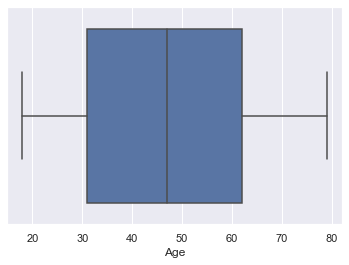

In [15]:
sns.boxplot(x = cust_df['Age'])

In [16]:
#Calculate summary statistics
summary = cust_df.describe()
summary = summary.transpose()
summary.head()

,count,mean,std,min,25%,50%,75%,max
Region,5000.0,3.00140,1.421760,1.0,2.0,3.0,4.0,5.0
Age,5000.0,47.02560,17.770338,18.0,31.0,47.0,62.0,79.0
EducationYears,5000.0,14.54300,3.281083,6.0,12.0,14.0,17.0,23.0
EmploymentLength,5000.0,9.73040,9.690929,0.0,2.0,7.0,15.0,52.0
DebtToIncomeRatio,5000.0,9.95416,6.399783,0.0,5.1,8.8,13.6,43.1


In [17]:
#Another way to get meta data for each variable in your dataset
cust_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 59 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           5000 non-null   object 
 1   Region               5000 non-null   int64  
 2   TownSize             5000 non-null   object 
 3   Gender               4967 non-null   object 
 4   Age                  5000 non-null   int64  
 5   EducationYears       5000 non-null   int64  
 6   JobCategory          4985 non-null   object 
 7   UnionMember          5000 non-null   object 
 8   EmploymentLength     5000 non-null   int64  
 9   Retired              5000 non-null   object 
 10  HHIncome             5000 non-null   object 
 11  DebtToIncomeRatio    5000 non-null   float64
 12  CreditDebt           5000 non-null   float64
 13  OtherDebt            5000 non-null   float64
 14  LoanDefault          5000 non-null   object 
 15  MaritalStatus        5000 non-null   o

In [18]:
#Calculate summary statistics
summary = cust_df.describe(include=['object'])
summary = summary.transpose()
summary.head()
print(cust_df.describe(include='all'))

,count,unique,top,freq
CustomerID,5000,5000,3877-LGSNNT-CP6,1
TownSize,5000,6,1,1436
Gender,4967,2,Female,2494
JobCategory,4985,6,Sales,1635
UnionMember,5000,2,No,4244


             CustomerID      Region TownSize  Gender          Age  \
count              5000  5000.00000     5000    4967  5000.000000   
unique             5000         NaN        6       2          NaN   
top     3877-LGSNNT-CP6         NaN        1  Female          NaN   
freq                  1         NaN     1436    2494          NaN   
mean                NaN     3.00140      NaN     NaN    47.025600   
std                 NaN     1.42176      NaN     NaN    17.770338   
min                 NaN     1.00000      NaN     NaN    18.000000   
25%                 NaN     2.00000      NaN     NaN    31.000000   
50%                 NaN     3.00000      NaN     NaN    47.000000   
75%                 NaN     4.00000      NaN     NaN    62.000000   
max                 NaN     5.00000      NaN     NaN    79.000000   

        EducationYears JobCategory UnionMember  EmploymentLength Retired  ...  \
count      5000.000000        4985        5000       5000.000000    5000  ...   
unique   

In [19]:
#conda install -c conda-forge pandas-profiling -- use this code snippet on your command line to install pandas-profiling 
#pandas_profiling provides a comprehensive report on the variables and various statistics around it.
#It can be fairly overwhelming but is very useful
#Do not use with large datasets
#pandas_profiling.ProfileReport(cust_df).to_file("report.html")

In [20]:
#How many missing values does Gender have?
cust_df['Gender'].isnull().sum()

33

In [21]:
#Another approach to answer the question of "How many missing values does Gender have?"
cust_df.Gender.isnull().sum()

33

In [22]:
#What is the datatype object for Gender. It is defined as a object or a string
cust_df['Gender'].dtype

dtype('O')

In [23]:
#Frequency distribution of Gender before imputation of missing values
counts_HHSize = cust_df['HouseholdSize'].value_counts()
print ("\Before imputation for missing values:")
print (counts_HHSize)

\Before imputation for missing values:
1.0    2032
2.0    1466
3.0     552
4.0     520
5.0     287
6.0      97
7.0      29
8.0       7
9.0       2
Name: HouseholdSize, dtype: int64


In [24]:
cust_df['HouseholdSize'].isnull().sum()

8

In [25]:
mode(cust_df['HouseholdSize'])

ModeResult(mode=array([1.]), count=array([2032]))

In [26]:
#Replace missing character values with the mode of the distribution 
#cust_df['HouseholdSize'].fillna(mode(cust_df['HouseholdSize']).mode[0], inplace=True)
cust_df['HouseholdSize'].fillna(mode(cust_df['HouseholdSize']).mode[0], inplace=True)                                                
cust_df['HouseholdSize'].isnull().sum()

0

In [27]:
#Frequency distribution of Gender
counts_HouseholdSize = cust_df['HouseholdSize'].value_counts()
print ("\After imputation for missing values:")
print (counts_HHSize)
print (cust_df['HouseholdSize'].isnull().sum())

\After imputation for missing values:
1.0    2032
2.0    1466
3.0     552
4.0     520
5.0     287
6.0      97
7.0      29
8.0       7
9.0       2
Name: HouseholdSize, dtype: int64
0


In [28]:
cust_df.shape

(5000, 59)

In [29]:
cust_df.head(5)

,CustomerID,Region,TownSize,Gender,Age,EducationYears,JobCategory,UnionMember,EmploymentLength,Retired,...,CallWait,CallForward,ThreeWayCalling,EBilling,TVWatchingHours,OwnsPC,OwnsMobileDevice,OwnsGameSystem,OwnsFax,NewsSubscriber
0,3964-QJWTRG-NPN,1,2,Female,20,15,Professional,Yes,0,No,...,Yes,Yes,Yes,No,13,No,Yes,Yes,No,No
1,0648-AIPJSP-UVM,5,5,Male,22,17,Sales,No,0,No,...,No,Yes,No,Yes,18,Yes,Yes,Yes,Yes,Yes
2,5195-TLUDJE-HVO,3,4,Female,67,14,Sales,No,16,No,...,No,No,No,No,21,No,No,No,No,Yes
3,4459-VLPQUH-3OL,4,3,Male,23,16,Sales,No,0,No,...,No,No,No,Yes,26,Yes,Yes,Yes,No,Yes
4,8158-SMTQFB-CNO,2,2,Male,26,16,Sales,No,1,No,...,Yes,Yes,Yes,No,27,Yes,No,Yes,No,No


In [30]:
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded

In [31]:
cust_df['HHIncome'].apply(type)

0       <class 'str'>
1       <class 'str'>
2       <class 'str'>
3       <class 'str'>
4       <class 'str'>
            ...      
4995    <class 'str'>
4996    <class 'str'>
4997    <class 'str'>
4998    <class 'str'>
4999    <class 'str'>
Name: HHIncome, Length: 5000, dtype: object

In [32]:
cust_df['HHIncome'].apply(type).value_counts()

<class 'str'>    5000
Name: HHIncome, dtype: int64

In [33]:
#Custom create function to clean variables with currency symbols
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

In [34]:
cust_df['HHIncome'] = cust_df['HHIncome'].apply(clean_currency).astype('float')

In [35]:
cust_df.head()

,CustomerID,Region,TownSize,Gender,Age,EducationYears,JobCategory,UnionMember,EmploymentLength,Retired,...,CallWait,CallForward,ThreeWayCalling,EBilling,TVWatchingHours,OwnsPC,OwnsMobileDevice,OwnsGameSystem,OwnsFax,NewsSubscriber
0,3964-QJWTRG-NPN,1,2,Female,20,15,Professional,Yes,0,No,...,Yes,Yes,Yes,No,13,No,Yes,Yes,No,No
1,0648-AIPJSP-UVM,5,5,Male,22,17,Sales,No,0,No,...,No,Yes,No,Yes,18,Yes,Yes,Yes,Yes,Yes
2,5195-TLUDJE-HVO,3,4,Female,67,14,Sales,No,16,No,...,No,No,No,No,21,No,No,No,No,Yes
3,4459-VLPQUH-3OL,4,3,Male,23,16,Sales,No,0,No,...,No,No,No,Yes,26,Yes,Yes,Yes,No,Yes
4,8158-SMTQFB-CNO,2,2,Male,26,16,Sales,No,1,No,...,Yes,Yes,Yes,No,27,Yes,No,Yes,No,No


In [36]:
np.mean(cust_df['HHIncome'])

54759.6

In [37]:
cust_df['HHIncome'].dtype

dtype('float64')

In [38]:
#Using lambda functions
#cust_df['Sales'] = cust_df['Sales'].apply(lambda x: x.replace('$', '').replace(',', '')
#                                if isinstance(x, str) else x).astype(float)

In [39]:
cust_df["LoanDefault"] = coding(cust_df["LoanDefault"], {'No':2,'Yes':1})
print ('\nAfter Coding:')
print (pd.value_counts(cust_df["LoanDefault"]))


After Coding:
2    3829
1    1171
Name: LoanDefault, dtype: int64


In [40]:
#Recoding Gender as a numeric variable 
cust_df["Gender_num"] = coding(cust_df["Gender"], {'Female':2,'Male':1})
print ('\nAfter Coding:')
print (pd.value_counts(cust_df["Gender_num"]))


After Coding:
2.0    2494
1.0    2473
Name: Gender_num, dtype: int64


In [41]:
#Recoding LoanDefault_num as a numeric variable 
cust_df["LoanDefault_num"] = coding(cust_df["LoanDefault"], {'No':2,'Yes':1})
print ('\nAfter Coding:')
print (pd.value_counts(cust_df["LoanDefault_num"]))


After Coding:
2    3829
1    1171
Name: LoanDefault_num, dtype: int64


In [42]:
#Recoding MaritalStatus as a numeric variable 
cust_df["MaritalStatus"] = coding(cust_df["MaritalStatus"], {'Unmarried':2,'Married':1})
print ('\nAfter Coding:')
print (pd.value_counts(cust_df["MaritalStatus"]))


After Coding:
2    2599
1    2401
Name: MaritalStatus, dtype: int64


In [43]:
#Frequency distribution of JobCategory before imputation of missing values
counts_JobCategory = cust_df['JobCategory'].value_counts()
print ("\Before imputation for missing values:")
print (counts_JobCategory)

\Before imputation for missing values:
Sales           1635
Professional    1380
Labor            686
Service          620
Crafts           452
Agriculture      212
Name: JobCategory, dtype: int64


In [44]:
cust_df['JobCategory'].mode

<bound method Series.mode of 0       Professional
1              Sales
2              Sales
3              Sales
4              Sales
            ...     
4995    Professional
4996    Professional
4997    Professional
4998           Sales
4999          Crafts
Name: JobCategory, Length: 5000, dtype: object>

In [45]:
#Replace missing character values with the mode of the distribution 
cust_df['JobCategory'].fillna(mode(cust_df['JobCategory']).mode[0], inplace=True)

In [46]:
#Frequency distribution of LoanDefault after imputation of missing values
counts_JobCategory = cust_df['JobCategory'].value_counts()
print ("\After imputation for missing values:")
print (counts_JobCategory)

\After imputation for missing values:
Sales           1650
Professional    1380
Labor            686
Service          620
Crafts           452
Agriculture      212
Name: JobCategory, dtype: int64


In [47]:
cust_df.describe(include = [np.number])

,Region,Age,EducationYears,EmploymentLength,HHIncome,DebtToIncomeRatio,CreditDebt,OtherDebt,LoanDefault,MaritalStatus,...,NumberDogs,NumberBirds,HomeOwner,CarsOwned,CardTenure,CardItemsMonthly,PhoneCoTenure,TVWatchingHours,Gender_num,LoanDefault_num
count,5000.00000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,...,4992.000000,4966.000000,4987.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,4967.000000,5000.00000
mean,3.00140,47.025600,14.543000,9.730400,5.475960e+04,9.954160,1.857326,3.654460,1.76580,1.519800,...,0.392829,0.111156,0.629637,2.130600,16.655800,10.17740,38.204800,19.645000,1.502114,1.76580
std,1.42176,17.770338,3.281083,9.690929,5.537751e+04,6.399783,3.415732,5.395172,0.42354,0.499658,...,0.796539,0.495832,0.482950,1.307473,12.020958,3.39114,22.661888,5.165609,0.500046,0.42354
min,1.00000,18.000000,6.000000,0.000000,9.000000e+03,0.000000,0.000000,0.000000,1.00000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.00000
25%,2.00000,31.000000,12.000000,2.000000,2.400000e+04,5.100000,0.385520,0.980302,2.00000,1.000000,...,0.000000,0.000000,0.000000,1.000000,6.000000,8.00000,18.000000,17.000000,1.000000,2.00000
50%,3.00000,47.000000,14.000000,7.000000,3.800000e+04,8.800000,0.926437,2.098540,2.00000,2.000000,...,0.000000,0.000000,1.000000,2.000000,14.000000,10.00000,38.000000,20.000000,2.000000,2.00000
75%,4.00000,62.000000,17.000000,15.000000,6.700000e+04,13.600000,2.063820,4.314780,2.00000,2.000000,...,0.000000,0.000000,1.000000,3.000000,26.000000,12.00000,59.000000,23.000000,2.000000,2.00000
max,5.00000,79.000000,23.000000,52.000000,1.073000e+06,43.100000,109.072596,141.459150,2.00000,2.000000,...,7.000000,5.000000,1.000000,8.000000,40.000000,23.00000,72.000000,36.000000,2.000000,2.00000


In [48]:
cust_df.describe(include = [np.object])

C:\Users\HP\AppData\Local\Temp/ipykernel_10652/653401256.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cust_df.describe(include = [np.object])


,CustomerID,TownSize,Gender,JobCategory,UnionMember,Retired,CarOwnership,CarBrand,CarValue,CommuteTime,...,CallerID,CallWait,CallForward,ThreeWayCalling,EBilling,OwnsPC,OwnsMobileDevice,OwnsGameSystem,OwnsFax,NewsSubscriber
count,5000,5000,4967,5000,5000,5000,5000,5000,5000,5000,...,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
unique,5000,6,2,6,2,2,3,3,801,42,...,2,2,2,2,2,2,2,2,2,2
top,3877-LGSNNT-CP6,1,Female,Sales,No,No,Own,Domestic,"$(1,000.00)",24,...,No,No,No,No,No,Yes,No,No,No,No
freq,1,1436,2494,1650,4244,4262,3704,2287,497,336,...,2624,2605,2597,2610,3257,3164,2604,2626,4106,2637


In [49]:
cust_df.DebtToIncomeRatio.describe()

count    5000.000000
mean        9.954160
std         6.399783
min         0.000000
25%         5.100000
50%         8.800000
75%        13.600000
max        43.100000
Name: DebtToIncomeRatio, dtype: float64

In [50]:
print (pd.value_counts(cust_df['OwnsMobileDevice']))

No     2604
Yes    2396
Name: OwnsMobileDevice, dtype: int64


In [51]:
cust_df['OwnsMobileDevice'].value_counts()

No     2604
Yes    2396
Name: OwnsMobileDevice, dtype: int64

In [52]:
#Binning continuous variables
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]
  print(break_points)  
  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(1,len(cut_points)+2)
  print(labels)
  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

In [53]:
#Binning DebtToIncomeRatio:
cut_points = [5,10,15]
#labels = ["low","medium","high","very high"]
#cust_df["DebtToIncomeRatio_Recoded"] = binning(cust_df["DebtToIncomeRatio"], cut_points,labels)
#To get labels that start from 0 modify above range function; To use labels add labels in binning function below
cust_df["DebtToIncomeRatio_Recoded"] = binning(cust_df["DebtToIncomeRatio"], cut_points)
print (pd.value_counts(cust_df["DebtToIncomeRatio_Recoded"], sort=False))

[0.0, 5, 10, 15, 43.1]
range(1, 5)
1    1215
2    1662
3    1176
4     947
Name: DebtToIncomeRatio_Recoded, dtype: int64


In [54]:
cust_df.Age.describe()

count    5000.000000
mean       47.025600
std        17.770338
min        18.000000
25%        31.000000
50%        47.000000
75%        62.000000
max        79.000000
Name: Age, dtype: float64

In [55]:
#Binning Age:
cut_points = [31,47,62]
labels = ["18-31",">31-47",">47-62",">62"]
cust_df["Age_Recoded"] = binning(cust_df["Age"], cut_points,labels)
print (pd.value_counts(cust_df["Age_Recoded"], sort=False))

[18, 31, 47, 62, 79]
['18-31', '>31-47', '>47-62', '>62']
18-31     1253
>31-47    1322
>47-62    1187
>62       1238
Name: Age_Recoded, dtype: int64


In [56]:
cust_df.PhoneCoTenure.describe()

count    5000.000000
mean       38.204800
std        22.661888
min         0.000000
25%        18.000000
50%        38.000000
75%        59.000000
max        72.000000
Name: PhoneCoTenure, dtype: float64

In [57]:
#Binning PhoneCoTenure:
cut_points = [18,38,59]
labels = ["0-18",">18-38",">38-59",">59"]
cust_df["PhoneCoTenure_Coded"] = binning(cust_df['PhoneCoTenure'], cut_points,labels)
print (pd.value_counts(cust_df['PhoneCoTenure_Coded'], sort=False))

[0, 18, 38, 59, 72]
['0-18', '>18-38', '>38-59', '>59']
0-18      1304
>18-38    1213
>38-59    1239
>59       1244
Name: PhoneCoTenure_Coded, dtype: int64


In [58]:
cust_df['JobCategory'].value_counts()

Sales           1650
Professional    1380
Labor            686
Service          620
Crafts           452
Agriculture      212
Name: JobCategory, dtype: int64

In [59]:
#Creating pivot tables; Higher levels of DebtToIncomeRatio for Yes to LoanDefault
LoanDefault_Grps = cust_df.pivot_table(values=["DebtToIncomeRatio"], index=['Gender','LoanDefault','Age_Recoded'], aggfunc=np.mean)
print (LoanDefault_Grps)

                                DebtToIncomeRatio
Gender LoanDefault Age_Recoded                   
Female 1           18-31                12.100949
                   >31-47               13.888889
                   >47-62               18.449315
                   >62                  16.936667
       2           18-31                 7.615773
                   >31-47                8.575502
                   >47-62                9.325333
                   >62                   9.301745
Male   1           18-31                11.483000
                   >31-47               13.780745
                   >47-62               15.282022
                   >62                  18.703226
       2           18-31                 7.415705
                   >31-47                8.225255
                   >47-62                9.120892
                   >62                  10.127181


In [60]:
#Coding a nominal variable into a numeric variable
#Define a generic function using Pandas replace function
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded

In [61]:
#Coding LoanStatus as Y=1, N=0:
print ('Before Coding:')
print (pd.value_counts(cust_df['OwnsMobileDevice']))
cust_df['OwnsMobileDevice_Coded'] = coding(cust_df['OwnsMobileDevice'], {'No':2,'Yes':1})
print ('\nAfter Coding:')
print (pd.value_counts(cust_df['OwnsMobileDevice_Coded']))

Before Coding:
No     2604
Yes    2396
Name: OwnsMobileDevice, dtype: int64

After Coding:
2    2604
1    2396
Name: OwnsMobileDevice_Coded, dtype: int64


In [62]:
cust_df_colnames = cust_df.columns.values.tolist()
cust_df_colnames

['CustomerID',
 'Region',
 'TownSize',
 'Gender',
 'Age',
 'EducationYears',
 'JobCategory',
 'UnionMember',
 'EmploymentLength',
 'Retired',
 'HHIncome',
 'DebtToIncomeRatio',
 'CreditDebt',
 'OtherDebt',
 'LoanDefault',
 'MaritalStatus',
 'HouseholdSize',
 'NumberPets',
 'NumberCats',
 'NumberDogs',
 'NumberBirds',
 'HomeOwner',
 'CarsOwned',
 'CarOwnership',
 'CarBrand',
 'CarValue',
 'CommuteTime',
 'PoliticalPartyMem',
 'Votes',
 'CreditCard',
 'CardTenure',
 'CardItemsMonthly',
 'CardSpendMonth',
 'ActiveLifestyle',
 'PhoneCoTenure',
 'VoiceLastMonth',
 'VoiceOverTenure',
 'EquipmentRental',
 'EquipmentLastMonth',
 'EquipmentOverTenure',
 'CallingCard',
 'WirelessData',
 'DataLastMonth',
 'DataOverTenure',
 'Multiline',
 'VM',
 'Pager',
 'Internet',
 'CallerID',
 'CallWait',
 'CallForward',
 'ThreeWayCalling',
 'EBilling',
 'TVWatchingHours',
 'OwnsPC',
 'OwnsMobileDevice',
 'OwnsGameSystem',
 'OwnsFax',
 'NewsSubscriber',
 'Gender_num',
 'LoanDefault_num',
 'DebtToIncomeRatio_Re

In [63]:
print (pd.value_counts(cust_df['HomeOwner']))

1.0    3140
0.0    1847
Name: HomeOwner, dtype: int64


In [64]:
cust_df['HomeOwner2'] = cust_df['HomeOwner'] + 1

In [65]:
print (pd.value_counts(cust_df['HomeOwner2']))

2.0    3140
1.0    1847
Name: HomeOwner2, dtype: int64


In [66]:
print (pd.value_counts(cust_df['VoiceLastMonth']))

 $12.60      31
 $15.00      29
 $23.70      28
 $16.95      25
 $22.50      25
             ..
 $99.00       1
 $144.90      1
 $65.85       1
 $200.25      1
 $101.25      1
Name: VoiceLastMonth, Length: 866, dtype: int64


In [67]:
print (pd.value_counts(cust_df['PhoneCoTenure']))

72    251
71    147
70     98
5      94
69     94
     ... 
38     51
49     48
40     47
51     40
0       3
Name: PhoneCoTenure, Length: 73, dtype: int64


In [68]:
cust_df['VoiceLastMonth_Coded'] = cust_df['VoiceLastMonth'].apply(clean_currency).astype('float')

In [69]:
sc.mean(cust_df['VoiceLastMonth_Coded'])

C:\Users\HP\AppData\Local\Temp/ipykernel_10652/3337499891.py:1: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sc.mean(cust_df['VoiceLastMonth_Coded'])


40.41435

In [70]:
#pandas_profiling.ProfileReport(cust_df).to_file("report_after.html")

In [71]:
cust_df.columns

Index(['CustomerID', 'Region', 'TownSize', 'Gender', 'Age', 'EducationYears',
       'JobCategory', 'UnionMember', 'EmploymentLength', 'Retired', 'HHIncome',
       'DebtToIncomeRatio', 'CreditDebt', 'OtherDebt', 'LoanDefault',
       'MaritalStatus', 'HouseholdSize', 'NumberPets', 'NumberCats',
       'NumberDogs', 'NumberBirds', 'HomeOwner', 'CarsOwned', 'CarOwnership',
       'CarBrand', 'CarValue', 'CommuteTime', 'PoliticalPartyMem', 'Votes',
       'CreditCard', 'CardTenure', 'CardItemsMonthly', 'CardSpendMonth',
       'ActiveLifestyle', 'PhoneCoTenure', 'VoiceLastMonth', 'VoiceOverTenure',
       'EquipmentRental', 'EquipmentLastMonth', 'EquipmentOverTenure',
       'CallingCard', 'WirelessData', 'DataLastMonth', 'DataOverTenure',
       'Multiline', 'VM', 'Pager', 'Internet', 'CallerID', 'CallWait',
       'CallForward', 'ThreeWayCalling', 'EBilling', 'TVWatchingHours',
       'OwnsPC', 'OwnsMobileDevice', 'OwnsGameSystem', 'OwnsFax',
       'NewsSubscriber', 'Gender_num', 'Loa

In [72]:
cust_df["CarValue"] = cust_df["CarValue"].replace('[\$,\(\)]', '', regex=True).str.strip().astype(float)

In [73]:
cust_df["CardSpendMonth"] = cust_df["CardSpendMonth"].replace('[\$,\(\)]', ''
                                                              , regex=True).replace('[-]', '0'
                                                                                    , regex=True).str.strip().astype(float)
cust_df["CardSpendMonth_cat"] = pd.cut(cust_df["CardSpendMonth"],4,labels = [1,2,3,4])

In [74]:
cust_df["EquipmentOverTenure"] = cust_df["EquipmentOverTenure"].replace('[\$,\(\)]', ''
                                                              , regex=True).replace('[-]', '0'
                                                                                    , regex=True).str.strip().astype(float)
cust_df["EquipmentOverTenure_cat"] = pd.cut(cust_df["EquipmentOverTenure"],4,labels = [1,2,3,4])

In [75]:
cust_df["Internet"] = coding(cust_df["Internet"], {'No':2,'Yes':1})
print ('\nAfter Coding:')
print (pd.value_counts(cust_df["Internet"]))


After Coding:
2    2498
1     774
3     598
4     585
2     545
Name: Internet, dtype: int64


In [76]:
cust_df["WirelessData"] = coding(cust_df["WirelessData"], {'No':2,'Yes':1})

In [77]:
cust_df["CarValue_cat"] = pd.cut(cust_df["CarValue"],4,labels = [1,2,3,4])

In [78]:
cust_df['Age_Recoded'] = coding(cust_df['Age_Recoded'], {'18-31':1,'>31-47':2,
                                                         '>47-62':3,'>62':4})

In [79]:
cust_df["Age_Recoded"].unique()

[1, 4, 3, 2]
Categories (4, int64): [1 < 2 < 3 < 4]

In [80]:
cust_df['PhoneCoTenure_Coded'] = coding(cust_df['PhoneCoTenure_Coded'], {'0-18':1,'>18-38':2,
                                                         '>38-59':3,'>59':4})

In [81]:
cust_df['PhoneCoTenure_Coded'].unique()

[1, 3, 4, 2]
Categories (4, int64): [1 < 2 < 3 < 4]

In [82]:
cust_df["DataOverTenure"] = cust_df["DataOverTenure"].replace('[\$,\(\)]', ''
                                                              , regex=True).replace('[-]', '0'
                                                                                    , regex=True).str.strip().astype(float)
cust_df["DataOverTenure_coded"] = pd.cut(cust_df["DataOverTenure"],4,labels = [1,2,3,4])

In [145]:
cust_df["DataOverTenure_coded"].unique()

[1, 2, 3, 4]
Categories (4, int64): [1 < 2 < 3 < 4]

In [141]:
cust_df["DataOverTenure_coded"]

0       1
1       1
2       1
3       1
4       1
       ..
4995    1
4996    1
4997    1
4998    1
4999    1
Name: DataOverTenure_coded, Length: 5000, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [84]:
cust_df["EquipmentOverTenure_cat"] = pd.cut(cust_df["EquipmentOverTenure"],4,labels = [1,2,3,4])

In [85]:
#pandas_profiling.ProfileReport(cust_df).to_file("report.html")

In [86]:
#cust_df.to_csv(path_or_buf="aug_cust.csv")

In [87]:
col_list = ['Region','CardSpendMonth_cat','VoiceLastMonth_Coded',
            'HomeOwner2','OwnsMobileDevice_Coded',
            'PhoneCoTenure_Coded','Age_Recoded',
            'DebtToIncomeRatio_Recoded','LoanDefault_num',
            'Gender_num','MaritalStatus','WirelessData',
            'DataOverTenure']

In [88]:
#from itertools import permutations
#col_comb = list(permutations(col_list,10))
#col_comb

In [147]:
#Selecting the columns or variables that you want to use for clustering
col_list = ['Age_Recoded','LoanDefault_num','WirelessData','PhoneCoTenure_Coded',
            'CardSpendMonth_cat','OwnsMobileDevice_Coded',
            'VoiceLastMonth_Coded']
len(col_list)

7

In [148]:
cust_df_kmeans = cust_df[col_list]

In [149]:
cust_df_kmeans = cust_df_kmeans.dropna(how='any',axis=0)

In [150]:
#cust_df_kmeans = cust_df_kmeans[0:500]

In [151]:
cust_df_kmeans.head(5)

,Age_Recoded,LoanDefault_num,WirelessData,PhoneCoTenure_Coded,CardSpendMonth_cat,OwnsMobileDevice_Coded,VoiceLastMonth_Coded
0,1,1,2,1,1,1,19.50
1,1,1,1,3,1,1,26.70
2,4,2,2,4,1,2,85.20
3,1,1,2,2,1,1,18.00
4,1,2,1,2,1,2,9.15


In [152]:
cust_df_kmeans.shape

(5000, 7)

In [153]:
cust_df_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Age_Recoded             5000 non-null   category
 1   LoanDefault_num         5000 non-null   int64   
 2   WirelessData            5000 non-null   int64   
 3   PhoneCoTenure_Coded     5000 non-null   category
 4   CardSpendMonth_cat      5000 non-null   category
 5   OwnsMobileDevice_Coded  5000 non-null   int64   
 6   VoiceLastMonth_Coded    5000 non-null   float64 
dtypes: category(3), float64(1), int64(3)
memory usage: 210.6 KB


In [154]:
#test = ufo.loc[~ufo.index.isin(train.index), :]

In [155]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cust_kmeans_scaled = scaler.fit_transform(cust_df_kmeans)
#Assign the scaled data to a DataFrame using the index keyword arguments
cust_kmeans_scaled_df = pd.DataFrame(cust_kmeans_scaled, index = cust_df_kmeans.index)
cust_kmeans_scaled_df.head()

,0,1,2,3,4,5,6
0,-1.327627,-1.808274,0.606313,-1.317908,-0.155168,-1.042502,-0.545834
1,-1.327627,-1.808274,-1.649314,0.457530,-0.155168,-1.042502,-0.357925
2,1.359877,0.553014,0.606313,1.345249,-0.155168,0.959230,1.168840
3,-1.327627,-1.808274,0.606313,-0.430189,-0.155168,-1.042502,-0.584982
4,-1.327627,0.553014,-1.649314,-0.430189,-0.155168,0.959230,-0.815954


In [156]:
# statistics of scaled data
pd.DataFrame(cust_kmeans_scaled_df).describe()

,0,1,2,3,4,5,6
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,-1.676881e-16,-5.115908e-17,-1.080025e-16,7.105427e-17,-3.783640e-16,7.744916e-17,3.126388e-17
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.327627e+00,-1.808274e+00,-1.649314e+00,-1.317908e+00,-1.551683e-01,-1.042502e+00,-9.842897e-01
25%,-1.327627e+00,5.530135e-01,-1.649314e+00,-1.317908e+00,-1.551683e-01,-1.042502e+00,-6.084706e-01
50%,-4.317922e-01,5.530135e-01,6.063125e-01,-4.301887e-01,-1.551683e-01,9.592304e-01,-3.070324e-01
75%,4.640422e-01,5.530135e-01,6.063125e-01,4.575304e-01,-1.551683e-01,9.592304e-01,2.410370e-01
max,1.359877e+00,5.530135e-01,6.063125e-01,1.345249e+00,1.671095e+01,9.592304e-01,1.302671e+01


KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

KMeans(n_clusters=7)

KMeans()

KMeans(n_clusters=9)

<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'Inertia')

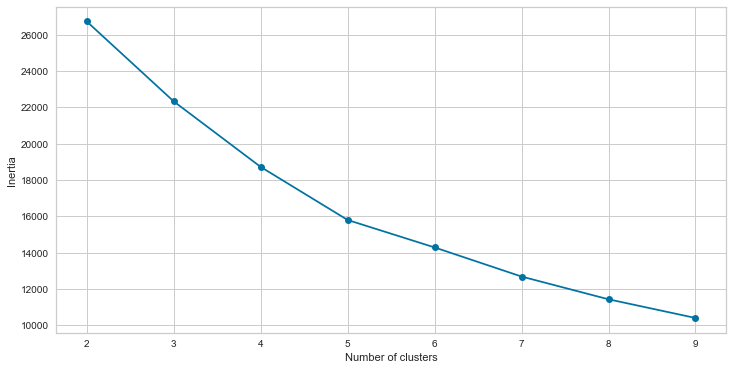

In [157]:
# Plot inertia for multiple cluster solutions against the number of clusters
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(2,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(cust_kmeans_scaled_df)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
cust_df_frame = pd.DataFrame({'Cluster':range(2,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(cust_df_frame['Cluster'], cust_df_frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [158]:
# Defining the kmeans function with initialization as k-means++; # You want to cluster into 5 segments
kmeans_5 = KMeans(n_clusters = 5, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans_5.fit(cust_kmeans_scaled_df)

KMeans(n_clusters=5)

In [159]:
# Inertia calculates the sum of all the points within a cluster from the centroid of that cluster.
# Determine inertia on the fitted data
kmeans_5.inertia_

15796.879337400043

In [160]:
pred_clus5 = kmeans_5.predict(cust_kmeans_scaled_df)

In [161]:
cust_df_frame_2 = pd.DataFrame(cust_kmeans_scaled_df)
cust_df_frame_2['cluster'] = pred_clus5
cust_df_frame_2['cluster'].value_counts()

1    1471
0    1435
4    1047
2     918
3     129
Name: cluster, dtype: int64

In [162]:
# Using head shows the data structure of the resulting data frame
# There are 10 variables used for clustering and their scaled values are shown
# The last column is the cluster solution and shows the cluster to which obsevation belongs
# There are five segments starting from 0 to 4
cust_df_frame_2.head(5)

,0,1,2,3,4,5,6,cluster
0,-1.327627,-1.808274,0.606313,-1.317908,-0.155168,-1.042502,-0.545834,4
1,-1.327627,-1.808274,-1.649314,0.457530,-0.155168,-1.042502,-0.357925,4
2,1.359877,0.553014,0.606313,1.345249,-0.155168,0.959230,1.168840,0
3,-1.327627,-1.808274,0.606313,-0.430189,-0.155168,-1.042502,-0.584982,4
4,-1.327627,0.553014,-1.649314,-0.430189,-0.155168,0.959230,-0.815954,2


In [163]:
# Get the cluster centroids
print(kmeans_5.cluster_centers_)

[[ 0.94215258  0.46768557  0.48404783  1.04852058 -0.15516827  0.43897458
   0.87780527]
 [-0.34568949  0.55301354  0.60631253 -0.55847526 -0.15516827  0.04773921
  -0.4653636 ]
 [-0.00729549  0.45526961 -1.64931443 -0.02114164 -0.15516827 -0.50827092
  -0.15640714]
 [ 0.14459739 -0.06934131 -0.19801957  0.20979485  5.85910584 -0.11146393
   0.20877802]
 [-0.82195501 -1.80827399 -0.04430767 -0.6658963  -0.15516827 -0.21083695
  -0.44300286]]


In [164]:
# Create a new data column cluster5_2 to incorporate a cluster indicator variable running from 1 to 5
cust_df_frame_2['cluster5_2'] = cust_df_frame_2['cluster'] + 1
cust_df_frame_2.head(5)

,0,1,2,3,4,5,6,cluster,cluster5_2
0,-1.327627,-1.808274,0.606313,-1.317908,-0.155168,-1.042502,-0.545834,4,5
1,-1.327627,-1.808274,-1.649314,0.457530,-0.155168,-1.042502,-0.357925,4,5
2,1.359877,0.553014,0.606313,1.345249,-0.155168,0.959230,1.168840,0,1
3,-1.327627,-1.808274,0.606313,-0.430189,-0.155168,-1.042502,-0.584982,4,5
4,-1.327627,0.553014,-1.649314,-0.430189,-0.155168,0.959230,-0.815954,2,3


In [165]:
# Get the cluster labels
print(kmeans_5.labels_)

[4 4 0 ... 0 4 1]


In [166]:
cust_df_frame_2['cluster5_2'].value_counts()

2    1471
1    1435
5    1047
3     918
4     129
Name: cluster5_2, dtype: int64

In [167]:
cust_df_frame_2

,0,1,2,3,4,5,6,cluster,cluster5_2
0,-1.327627,-1.808274,0.606313,-1.317908,-0.155168,-1.042502,-0.545834,4,5
1,-1.327627,-1.808274,-1.649314,0.457530,-0.155168,-1.042502,-0.357925,4,5
2,1.359877,0.553014,0.606313,1.345249,-0.155168,0.959230,1.168840,0,1
3,-1.327627,-1.808274,0.606313,-0.430189,-0.155168,-1.042502,-0.584982,4,5
4,-1.327627,0.553014,-1.649314,-0.430189,-0.155168,0.959230,-0.815954,2,3
...,...,...,...,...,...,...,...,...,...
4995,1.359877,0.553014,0.606313,1.345249,-0.155168,0.959230,1.615125,0,1
4996,0.464042,-1.808274,-1.649314,-0.430189,-0.155168,0.959230,-0.240481,4,5
4997,1.359877,0.553014,0.606313,1.345249,-0.155168,0.959230,1.247136,0,1
4998,-0.431792,-1.808274,0.606313,-0.430189,-0.155168,-1.042502,-0.432305,4,5


In [168]:
# Plotting the cluster centers and the data points on a 2D plane; Need to think through this
#plt.scatter(cust_df_frame_2["cluster"], cust_df_frame_2["cluster5_2"])

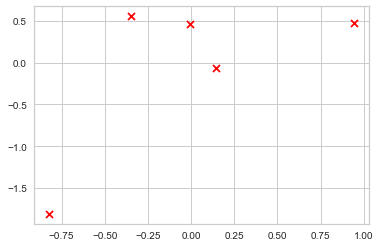

In [169]:
plt.scatter(kmeans_5.cluster_centers_[:, 0], kmeans_5.cluster_centers_[:, 1], c='red', marker='x')

In [170]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score
print(silhouette_score(cust_df_frame_2, kmeans.labels_))

0.35538001096525323


C:\Users\HP\.conda\envs\EAI6010\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\HP\.conda\envs\EAI6010\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\HP\.conda\envs\EAI6010\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\HP\.conda\envs\EAI6010\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would re

KElbowVisualizer(ax=<AxesSubplot:>, k=None, metric='silhouette', model=None,
                 timings=False)

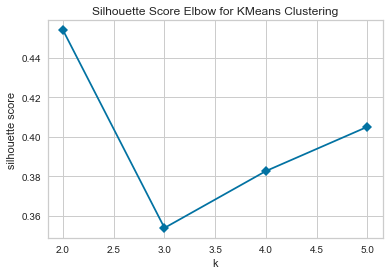

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [171]:
# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(cust_df_frame_2)    
visualizer.poof()  

In [172]:
# Joining the clusters from kmeans to the original data used for clustering
cust_df_clus5_ALL = pd.DataFrame(pd.concat([cust_df_frame_2, cust_df], axis = 1))
cust_df_clus5_ALL.shape

(5000, 80)

In [173]:
cust_df_clus5_ALL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 80 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   0                          5000 non-null   float64 
 1   1                          5000 non-null   float64 
 2   2                          5000 non-null   float64 
 3   3                          5000 non-null   float64 
 4   4                          5000 non-null   float64 
 5   5                          5000 non-null   float64 
 6   6                          5000 non-null   float64 
 7   cluster                    5000 non-null   int32   
 8   cluster5_2                 5000 non-null   int32   
 9   CustomerID                 5000 non-null   object  
 10  Region                     5000 non-null   int64   
 11  TownSize                   5000 non-null   object  
 12  Gender                     4967 non-null   object  
 13  Age                        5000 n

In [174]:
# Using pandas crosstabs to create a cross tab of clusters by loan defaults
pd.crosstab(cust_df_clus5_ALL['cluster5_2'],cust_df_clus5_ALL['LoanDefault'],margins=True, normalize = 'columns')

LoanDefault,1,2,All
cluster5_2,,,
1,0.044406,0.361191,0.2870
2,0.000000,0.384173,0.2942
3,0.032451,0.229825,0.1836
4,0.029035,0.024811,0.0258
5,0.894108,0.000000,0.2094


In [175]:
pd.crosstab(cust_df_clus5_ALL['cluster5_2'],cust_df_clus5_ALL['WirelessData'],margins=True, normalize = 'columns')

WirelessData,1,2,All
cluster5_2,,,
1,0.058036,0.371171,0.2870
2,0.000000,0.402352,0.2942
3,0.683036,0.000000,0.1836
4,0.034226,0.022702,0.0258
5,0.224702,0.203775,0.2094


In [201]:
pd.crosstab(cust_df_clus5_ALL['cluster5_2'],cust_df_clus5_ALL['PhoneCoTenure_Coded'],margins=True, normalize = 'columns')

PhoneCoTenure_Coded,1,2,3,4,All
cluster5_2,,,,,
1,0.000000,0.020610,0.343826,0.790997,0.2870
2,0.425613,0.478978,0.261501,0.008842,0.2942
3,0.159509,0.209398,0.226796,0.140675,0.1836
4,0.016871,0.024732,0.031477,0.030547,0.0258
5,0.398006,0.266282,0.136400,0.028939,0.2094


In [177]:
cust_df_clus5_ALL.groupby(by = "cluster5_2").mean()["VoiceLastMonth_Coded"]

cluster5_2
1    74.173589
2    22.601360
3    34.421405
4    48.413953
5    23.440115
Name: VoiceLastMonth_Coded, dtype: float64

In [178]:
cust_df_clus5_ALL.groupby(by = "cluster5_2").mean()["OwnsMobileDevice_Coded"]

cluster5_2
1    1.740767
2    1.544528
3    1.266885
4    1.465116
5    1.415473
Name: OwnsMobileDevice_Coded, dtype: float64

In [202]:
cust_df_clus5_ALL.groupby(by = "cluster5_2").mean()["PhoneCoTenure"]

cluster5_2
1    62.025784
2    25.855201
3    37.732026
4    42.759690
5    22.760267
Name: PhoneCoTenure, dtype: float64

In [179]:
# Using pandas pivot tables to create a cross tab of DebtToIncomeRatio by clusters by loan defaults by Age

Cluster_Grps = cust_df_clus5_ALL.pivot_table(values=["DebtToIncomeRatio"], index=['cluster5_2','WirelessData',
                                                                                  'LoanDefault',
                                                                                  'Age_Recoded'], aggfunc=np.mean)
display (Cluster_Grps)

DebtToIncomeRatio
cluster5_2 WirelessData LoanDefault Age_Recoded                   
1          1            1           3                    20.850000
                                    4                    13.666667
                        2           2                     5.800000
                                    3                     9.529412
                                    4                     9.396226
           2            1           2                    16.600000
                                    3                    18.070833
                                    4                    19.247368
                        2           1                     8.028571
                                    2                     9.224272
                                    3                     9.443223
                                    4                     9.887423
2          2            2           1                     7.546469
                                    2                     8.379029
                                    3                     9.115432
                                    4                     9.643511
3          1            1           2                    13.544444
                                    3                    17.219048
                                    4                    24.800000
                        2           1                     7.726705
                                    2                     8.273540
                                    3                     8.957143
                                    4                     9.260248
4          1            1           1                    10.300000
                                    2                    12.200000
                                    3                    14.081818
                                    4                    17.600000
                        2           1                     3.940000
                                    2                     8.600000
                                    3                     7.666667
                                    4                    13.133333
           2            1           1                    12.875000
                                    2                    11.100000
                                    3                    18.050000
                                    4                     8.400000
                        2           1                     5.540000
                                    2                     7.863158
                                    3                    10.466667
                                    4                    10.360000
5          1            1           1                    12.136723
                                    2                    13.066000
                                    3                    17.471429
                                    4                    10.575000
           2            1           1                    11.657011
                                    2                    14.268599
                                    3                    15.967089
                                    4                    16.537500

In [180]:
#Extracting the cluster data from the original cluster solution and saving it as a DataFrame with an index
cust_df_kmeans_cluster5_2 = pd.DataFrame(cust_df_frame_2['cluster5_2'])
cust_df_kmeans_cluster5_2.head()

,cluster5_2
0,5
1,5
2,1
3,5
4,3


In [181]:
# Checking on the size and shape of the DataFrame
cust_df_kmeans_cluster5_2.shape

(5000, 1)

In [182]:
cust_df_kmeans.head(5)

,Age_Recoded,LoanDefault_num,WirelessData,PhoneCoTenure_Coded,CardSpendMonth_cat,OwnsMobileDevice_Coded,VoiceLastMonth_Coded
0,1,1,2,1,1,1,19.50
1,1,1,1,3,1,1,26.70
2,4,2,2,4,1,2,85.20
3,1,1,2,2,1,1,18.00
4,1,2,1,2,1,2,9.15


In [183]:
# Joining the clusters from kmeans to the original data used for clustering
cust_df_clus5_rf = pd.DataFrame(pd.concat([cust_df_kmeans_cluster5_2, cust_df_kmeans], axis = 1))

In [184]:
cust_df_clus5_rf.head()

,cluster5_2,Age_Recoded,LoanDefault_num,WirelessData,PhoneCoTenure_Coded,CardSpendMonth_cat,OwnsMobileDevice_Coded,VoiceLastMonth_Coded
0,5,1,1,2,1,1,1,19.50
1,5,1,1,1,3,1,1,26.70
2,1,4,2,2,4,1,2,85.20
3,5,1,1,2,2,1,1,18.00
4,3,1,2,1,2,1,2,9.15


In [185]:
cust_df_clus5_rf.shape

(5000, 8)

In [186]:
# Check on the cluster distribution after extraction and concatenating
cust_df_clus5_rf['cluster5_2'].value_counts()

2    1471
1    1435
5    1047
3     918
4     129
Name: cluster5_2, dtype: int64

### END OF SEGMENTATION EXAMPLE CODE 

#For those intersting in exploring a Random Forest Model
def split_data(df, train_perc = 0.8):
    df['train'] = np.random.rand(len(df)) < train_perc
    train = df[df.train == 1]
    test = df[df.train == 0]
    split_data ={'train': train, 'test': test}
    return split_data

In [187]:
#split_data(cust_df_kmeans,0.8)

In [188]:
probs = np.random.rand(len(cust_df_clus5_rf))
training_set = probs < 0.8
test_set = (probs>=0.8)

cust_df_kmeans_clus_5_trg = cust_df_clus5_rf[training_set]
cust_df_kmeans_clus_5_tst = cust_df_clus5_rf[test_set]

In [189]:
# Removing the y variable - cluster5_2 from the training data set
cust_df_kmeans_clus_5_trg2 = cust_df_kmeans_clus_5_trg.drop('cluster5_2', 1)
cust_df_kmeans_clu_5_Y = pd.DataFrame(cust_df_kmeans_clus_5_trg['cluster5_2'])
cust_df_kmeans_clus_5_trg2.head()

,Age_Recoded,LoanDefault_num,WirelessData,PhoneCoTenure_Coded,CardSpendMonth_cat,OwnsMobileDevice_Coded,VoiceLastMonth_Coded
0,1,1,2,1,1,1,19.5
1,1,1,1,3,1,1,26.7
2,4,2,2,4,1,2,85.2
5,4,2,2,2,1,2,24.3
6,3,2,2,1,1,1,11.4


In [190]:
# Removing the y variable - cluster5_2 from the testing data set
cust_df_kmeans_clus_5_tst2 = cust_df_kmeans_clus_5_tst.drop('cluster5_2', 1)
cust_df_kmeans_clu_5_Y_tst = pd.DataFrame(cust_df_kmeans_clus_5_tst['cluster5_2'])
cust_df_kmeans_clus_5_tst2.head()

,Age_Recoded,LoanDefault_num,WirelessData,PhoneCoTenure_Coded,CardSpendMonth_cat,OwnsMobileDevice_Coded,VoiceLastMonth_Coded
3,1,1,2,2,1,1,18.00
4,1,2,1,2,1,2,9.15
13,3,2,2,3,1,2,36.30
14,4,2,2,4,1,2,41.70
18,1,2,2,2,1,2,10.35


In [191]:
cust_df_kmeans_clu_5_Y.head()

,cluster5_2
0,5
1,5
2,1
5,2
6,2


In [192]:
cust_df_kmeans_clus_5_trg2.shape

(4002, 7)

In [193]:
cust_df_kmeans_clus_5_tst.shape

(998, 8)

In [194]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf_5 = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_5.fit(cust_df_kmeans_clus_5_trg2, cust_df_kmeans_clu_5_Y)

cust_df_kmeans_clu_5_Y_pred = clf_5.predict(cust_df_kmeans_clus_5_tst2)

C:\Users\HP\AppData\Local\Temp/ipykernel_10652/4126461758.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_5.fit(cust_df_kmeans_clus_5_trg2, cust_df_kmeans_clu_5_Y)


RandomForestClassifier()

In [195]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(cust_df_kmeans_clu_5_Y_tst, cust_df_kmeans_clu_5_Y_pred))

Accuracy: 0.9949899799599199


In [196]:
# Create a list of feature names
feature_names = list(cust_df_kmeans_clus_5_trg2.columns)

In [197]:
# Compute feature importances for the features used in the RF model
feature_imp = pd.Series(clf_5.feature_importances_,index = feature_names).sort_values(ascending=False)
feature_imp

LoanDefault_num           0.294500
WirelessData              0.236717
VoiceLastMonth_Coded      0.153386
PhoneCoTenure_Coded       0.132652
Age_Recoded               0.106961
CardSpendMonth_cat        0.049469
OwnsMobileDevice_Coded    0.026315
dtype: float64

<AxesSubplot:>

Text(0.5, 0, 'Feature Importance Score')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Visualizing Important Features')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


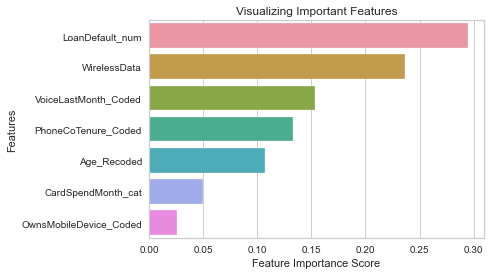

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()